In [ ]:
# 학습 : 파라메터 추정

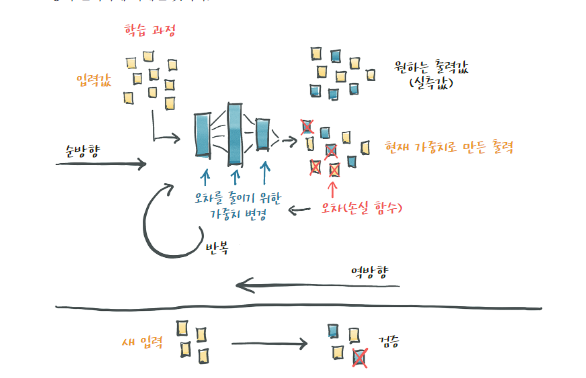

In [ ]:
# 온도문제
import numpy as np
import torch

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


In [ ]:
import matplotlib.pyplot as plt  

In [ ]:
t_c.sort().values

tensor([-4.0000,  0.5000,  3.0000,  6.0000,  8.0000, 11.0000, 13.0000, 14.0000,
        15.0000, 21.0000, 28.0000])

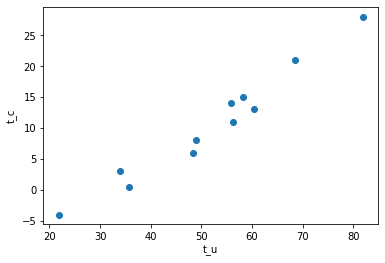

In [ ]:
plt.scatter(t_u, t_c)
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.show()

In [ ]:
# t_c = w*t_u + b
# 손실함수 : 오차를 측정할 구체적인 방법을 정의한 함수
# 예측값을 t_p
# loss abs(t_p - t_c)  or  (t_p - t_c)**2
# 오차중에 가중치가 큰 샘플을 우선 적용

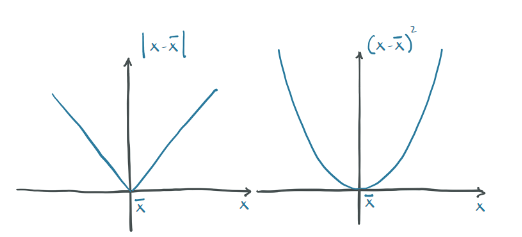

In [ ]:
def model(t_u, w, b): 
  return w*t_u+b

In [ ]:
def loss_fn(t_p, t_c):
  squred_error = (t_p - t_c)**2
  return squred_error.mean()

In [ ]:
# 파라메터를 초기화
w = torch.ones(())
b = torch.zeros(())

In [ ]:
t_p = model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [ ]:
delta = 0.1
loss_rate_of_change_w = (loss_fn( model(t_u,w+delta,b), t_c) -  loss_fn( model(t_u,w-delta,b), t_c) ) / (delta*2)

In [ ]:
learning_rate = 1e-2
w = w-learning_rate*loss_rate_of_change_w


In [ ]:
loss_rate_of_change_b = (loss_fn( model(t_u,w,b+delta), t_c) -  loss_fn( model(t_u,w-delta,b), t_c) ) / (delta*2)

In [ ]:
b = b-learning_rate*loss_rate_of_change_b

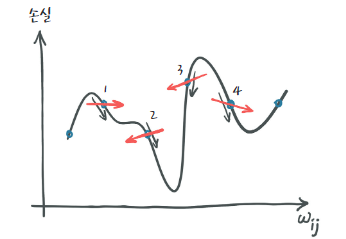

In [ ]:
# 도함수
def dloss_fn(t_p, t_c):
  dsq_diffs = 2*(t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [ ]:
# 미분 함수
def model_dw(t_u,w,b):
  return t_u
def model_db(t_u,w,b):
  return 1.  

In [ ]:
# 경사함수
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p,t_c)
  dloss_dw = dloss_dtp*model_dw(t_u,w,b)
  dloss_db = dloss_dtp*model_db(t_u,w,b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

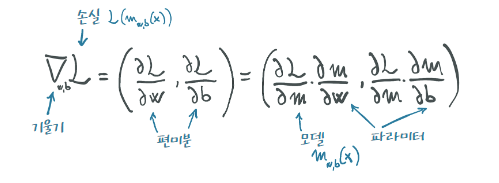

In [ ]:
def traning_loop(n_epochs, learning_rate,params, t_u, t_c):
  for epoch in range(1, n_epochs+1):
    w,b = params
    # 순방향
    t_p = model(t_u, w,b)
    loss = loss_fn(t_p,t_c)    
    # 역방향
    grad = grad_fn(t_u,t_c,t_p,w,b)

    params = params-learning_rate * grad  # 파라메터 업데이트
    print(f"epoch : {epoch} loss:{float(loss)} grad : {grad}")
  return params



In [ ]:
from prompt_toolkit.key_binding.bindings.vi import load_vi_search_bindings
# 실행
# n_epochs, learning_rate,params, t_u, t_c
traning_loop(n_epochs=100,learning_rate=1e-2, params=torch.tensor([1.0,0.0]),t_u=t_u,t_c =t_c) 

In [ ]:
# params 조정과정이 너무 크다
# 무한대로 : 더이상 학습이안된경우
# nan 값이 커서 튕겨버림

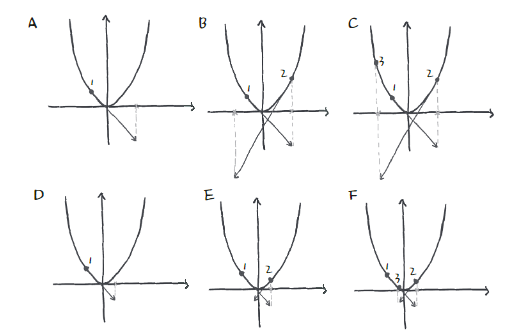

In [ ]:
traning_loop(n_epochs=100,learning_rate=1e-4, params=torch.tensor([1.0,0.0]),t_u=t_u,t_c =t_c) 

epoch : 1 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 2 loss:323.09051513671875 grad : tensor([1859.5493,   35.7843])
epoch : 3 loss:78.92963409423828 grad : tensor([765.4666,  16.5122])
epoch : 4 loss:37.5528450012207 grad : tensor([315.0790,   8.5787])
epoch : 5 loss:30.540283203125 grad : tensor([129.6733,   5.3127])
epoch : 6 loss:29.351154327392578 grad : tensor([53.3495,  3.9682])
epoch : 7 loss:29.148883819580078 grad : tensor([21.9304,  3.4148])
epoch : 8 loss:29.113847732543945 grad : tensor([8.9964, 3.1869])
epoch : 9 loss:29.107145309448242 grad : tensor([3.6721, 3.0930])
epoch : 10 loss:29.105247497558594 grad : tensor([1.4803, 3.0544])
epoch : 11 loss:29.104167938232422 grad : tensor([0.5781, 3.0384])
epoch : 12 loss:29.103221893310547 grad : tensor([0.2066, 3.0318])
epoch : 13 loss:29.102294921875 grad : tensor([0.0537, 3.0291])
epoch : 14 loss:29.10137939453125 grad : tensor([-0.0093,  3.0279])
epoch : 15 loss:29.100465774536133 grad : tensor([-0.03

tensor([ 0.2327, -0.0438])

In [ ]:
t_u_scaled = (t_u - t_u.mean())/t_u.std()
t_c_scaled = (t_c - t_c.mean())/t_c.std()
t_u_scaled, t_c_scaled

(tensor([-0.9565,  0.2436,  0.3802,  1.7883,  0.2673, -0.1723, -1.0635, -1.7823,
         -0.2020,  0.5109,  0.9862]),
 tensor([-1.0856,  0.3800,  0.4885,  1.8998,  0.0543, -0.2714, -0.8142, -1.5741,
         -0.4885,  0.2714,  1.1399]))

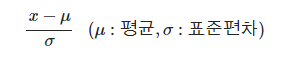

In [ ]:
params = traning_loop(n_epochs=100,learning_rate=1e-4, params=torch.tensor([1.0,0.0]),t_u=t_u_scaled,t_c =t_c_scaled) 

epoch : 1 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 2 loss:0.03483740985393524 grad : tensor([ 3.4831e-02, -2.6450e-07])
epoch : 3 loss:0.03483729436993599 grad : tensor([ 3.4825e-02, -2.6077e-07])
epoch : 4 loss:0.03483717143535614 grad : tensor([ 3.4819e-02, -2.7195e-07])
epoch : 5 loss:0.03483705222606659 grad : tensor([ 3.4812e-02, -2.6077e-07])
epoch : 6 loss:0.03483693674206734 grad : tensor([ 3.4806e-02, -2.6822e-07])
epoch : 7 loss:0.03483681380748749 grad : tensor([ 3.4800e-02, -2.6822e-07])
epoch : 8 loss:0.03483669087290764 grad : tensor([ 3.4793e-02, -2.5705e-07])
epoch : 9 loss:0.034836575388908386 grad : tensor([ 3.4787e-02, -2.7567e-07])
epoch : 10 loss:0.03483645245432854 grad : tensor([ 3.4781e-02, -2.7195e-07])
epoch : 11 loss:0.034836336970329285 grad : tensor([ 3.4775e-02, -2.7567e-07])
epoch : 12 loss:0.03483621031045914 grad : tensor([ 3.4768e-02, -2.5705e-07])
epoch : 13 loss:0.03483608737587929 grad : tensor([ 3.4762e-02, -2.6822

In [ ]:
t_p = model(t_u_scaled,*params)

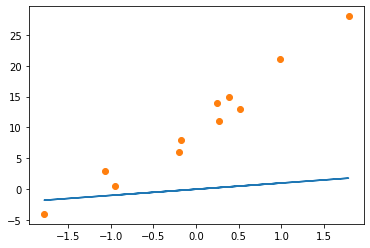

In [ ]:
plt.plot(t_u_scaled.numpy(),t_p.detach().numpy() )
plt.plot(t_u_scaled.numpy(),t_c.numpy(),'o' )

In [ ]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [ ]:
# 자동미분
params = torch.tensor([1.0,0.0], requires_grad=True)

In [ ]:
params.grad is None

True

In [ ]:
loss = loss_fn(model(t_u,*params),t_c)

In [ ]:
loss.backward()

In [ ]:
params.grad is None

False

In [ ]:
params.grad

tensor([4517.2969,   82.6000])